In [1]:
from easygpr.utils.settings import set_gpytorch_settings
set_gpytorch_settings()

from easygpr.utils.data_handling import MinMaxScaler
import numpy as np
import torch

# Generating data with different ranges for each feature
feature1 = np.random.rand(100) * 10  # Range: 0 to 10
feature2 = np.random.rand(100) * 20  # Range: 0 to 20
feature3 = np.random.rand(100) * 30  # Range: 0 to 30
data = np.vstack((feature1, feature2, feature3)).T

# Initializing and fitting the scaler
scaler = MinMaxScaler()
scaler.fit(torch.tensor(data, dtype=torch.float32))

# Scaling and unscaling the data
scaled_data = scaler.scale(torch.tensor(data, dtype=torch.float32))
unscaled_data = scaler.unscale(scaled_data)

# Printing the original, scaled, and unscaled data
print("Original Data: ", data[:5])
print("Scaled Data: ", scaled_data[:5])
print("Unscaled Data: ", unscaled_data[:5])


Original Data:  [[ 5.36447087 15.69088799 22.74915187]
 [ 1.35746946  9.79817497 26.51951586]
 [ 3.49047002 13.51323248 27.900865  ]
 [ 9.77545176  8.44515059 27.74413512]
 [ 2.10584266  8.4764169  26.66510586]]
Scaled Data:  tensor([[0.5390, 0.7868, 0.7575],
        [0.1351, 0.4908, 0.8846],
        [0.3501, 0.6774, 0.9312],
        [0.9836, 0.4229, 0.9259],
        [0.2106, 0.4245, 0.8895]], dtype=torch.float32)
Unscaled Data:  tensor([[[ 5.3645, 10.7572, 16.2703],
         [ 7.8227, 15.6909, 23.6190],
         [ 7.5317, 15.1069, 22.7492]],

        [[ 1.3575,  2.7150,  4.2915],
         [ 4.8866,  9.7982, 14.8419],
         [ 8.7929, 17.6382, 26.5195]],

        [[ 3.4905,  6.9960, 10.6681],
         [ 6.7377, 13.5132, 20.3754],
         [ 9.2550, 18.5656, 27.9009]],

        [[ 9.7755, 19.6102, 29.4568],
         [ 4.2125,  8.4452, 12.8265],
         [ 9.2025, 18.4604, 27.7441]],

        [[ 2.1058,  4.2170,  6.5287],
         [ 4.2281,  8.4764, 12.8731],
         [ 8.8416, 17.7359

In [2]:


import torch
import gpytorch
import numpy as np
import pandas as pd
from easygpr.core import GPRModel
from easygpr.kernels import KernelWrapper

# Create synthetic data
n = 1000
np.random.seed(42)
X1 = (np.random.rand(n) - 0.1) * 10  # Scale 10
X2 = (np.random.rand(n) - 0.5) * 100  # Scale 100
X3 = (np.random.rand(n) + 0.01) * 1000  # Scale 1000, but irrelevant to the output
X = np.vstack([X1, X2, X3]).T
y = np.sin(X1) + X2/100 * np.sin(X2/10) * 3 + np.random.normal(0, 0.01, n)  # Output is not dependent on X3

# Scaling and unscaling the data
scaled_data = scaler.scale(torch.tensor(X, dtype=torch.float32))
unscaled_data = scaler.unscale(scaled_data)

# Printing the original, scaled, and unscaled data
print("Original Data: ", data[:5])
print("Scaled Data: ", scaled_data[:5])
print("Unscaled Data: ", unscaled_data[:5])
import matplotlib.pyplot as plt


Original Data:  [[ 5.36447087 15.69088799 22.74915187]
 [ 1.35746946  9.79817497 26.51951586]
 [ 3.49047002 13.51323248 27.900865  ]
 [ 9.77545176  8.44515059 27.74413512]
 [ 2.10584266  8.4764169  26.66510586]]
Scaled Data:  tensor([[ 0.2750, -1.5825,  9.1515],
        [ 0.8558,  0.2092,  8.6550],
        [ 0.6353,  1.8717, 30.8837],
        [ 0.5009,  1.1650,  8.7415],
        [ 0.0548,  1.5384,  9.4969]], dtype=torch.float32)
Unscaled Data:  tensor([[[ 2.7454e+00,  5.5006e+00,  8.4407e+00],
         [-1.5683e+01, -3.1487e+01, -4.6652e+01],
         [ 9.0810e+01,  1.8225e+02,  2.7171e+02]],

        [[ 8.5071e+00,  1.7065e+01,  2.5665e+01],
         [ 2.0924e+00,  4.1901e+00,  6.4887e+00],
         [ 8.5883e+01,  1.7236e+02,  2.5698e+02]],

        [[ 6.3199e+00,  1.2675e+01,  1.9127e+01],
         [ 1.8587e+01,  3.7295e+01,  5.5798e+01],
         [ 3.0642e+02,  6.1498e+02,  9.1625e+02]],

        [[ 4.9866e+00,  9.9988e+00,  1.5141e+01],
         [ 1.1575e+01,  2.3222e+01,  3.4837e+

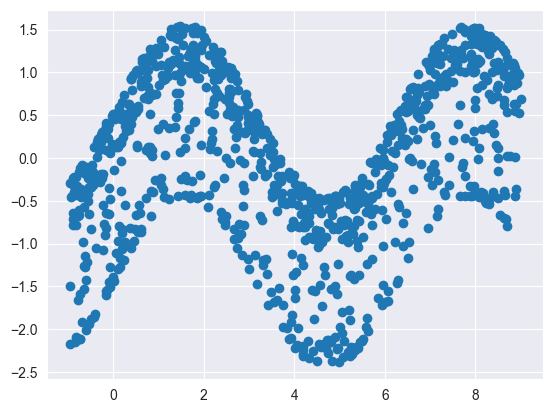

In [3]:
plt.scatter(X[:, 0], y)

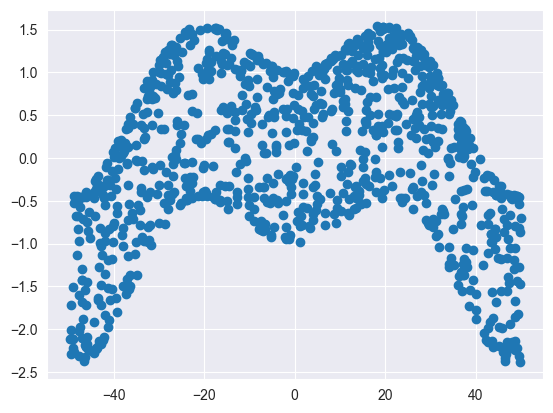

In [4]:
plt.scatter(X[:, 1], y)

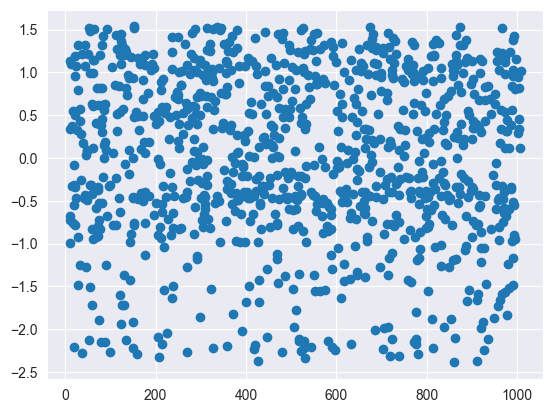

In [5]:
plt.scatter(X[:, 2], y)


In [6]:
# Convert to pandas DataFrame
feature_names = ['Feature1', 'Feature2', 'Feature3']
data = pd.DataFrame(X, columns=feature_names)
data['Target'] = y

# Split into train and test sets
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

train_x = train_data[feature_names].values
train_y = train_data['Target'].values
test_x = test_data[feature_names].values


In [7]:
# Create and train the model, then print hyperparameters
model = GPRModel(train_x=train_x, train_y=train_y, kernel='rbf', scale_x=True)
model.fit_model(training_iterations=50, verbose=False)

# Print hyperparameters with different configurations
print("1. With pandas DataFrame:")
model.print_hyperparameters()

print("\n2. With custom feature names:")
custom_feature_names = ['CustomFeature1', 'CustomFeature2']
model.print_hyperparameters(custom_feature_names)

print("\n3. With no feature names (numpy array):")
train_x_np = np.array(train_x)
model_no_names = GPRModel(train_x=train_x_np, train_y=train_y, kernel='rbf', scale_x=True)
model_no_names.fit_model(training_iterations=50, verbose=False)
model_no_names.print_hyperparameters()

1. With pandas DataFrame:

2. With custom feature names:


IndexError: list index out of range

In [ ]:
model.covar_module.base_kernel.lengthscale